In [1]:
import tensorflow as tf
import keras
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = "Dataset/"

classes = os.listdir(DATASET_PATH)

X, y = [], []

counter = 0

for class_path in classes:
    for img_path in os.listdir(f'{DATASET_PATH}{class_path}'):
        path = f'{DATASET_PATH}{class_path}/{img_path}'

        image = keras.preprocessing.image.load_img(path, color_mode="grayscale")
        image = keras.preprocessing.image.img_to_array(image)

        X.append(image)
        y.append(counter)
    
    counter += 1

X = np.array(X)
y = np.array(y)


In [3]:
X = X.astype("float32") / 255.0

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=24)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=24)

y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)
y_val = keras.utils.to_categorical(y_val, num_classes=4)

In [4]:
img_rows, img_cols = X.shape[1:3]

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(8, (5, 5), activation="relu", input_shape=(img_rows, img_cols, 1)),
    keras.layers.MaxPooling2D((2, 2), 2),
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2), 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(4, activation="softmax")
])

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


c:\Users\rcavi\dev\GitHub\Binus\Semester_5\deep-learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 8)    │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 108, 108, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 106, 106, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,752,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,757,172 (21.96 MB)

 Trainable params: 5,757,172 (21.96 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.3938 - loss: 1.3035 - val_accuracy: 0.4850 - val_loss: 1.2041
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6269 - loss: 1.0196 - val_accuracy: 0.7250 - val_loss: 0.8981
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7569 - loss: 0.7799 - val_accuracy: 0.7600 - val_loss: 0.7145
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8225 - loss: 0.6149 - val_accuracy: 0.7550 - val_loss: 0.6509
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8281 - loss: 0.5331 - val_accuracy: 0.8050 - val_loss: 0.5545
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8769 - loss: 0.4318 - val_accuracy: 0.8350 - val_loss: 0.5012
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8850 - loss: 0.3744 - val_accuracy: 0.8350 - val_loss: 0.4704
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9025 - loss: 0.3253 - val_accuracy: 0.8150 - v

In [29]:
model.evaluate(X_train, y_train)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9225 - loss: 0.2556


[0.25558188557624817, 0.9225000143051147]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


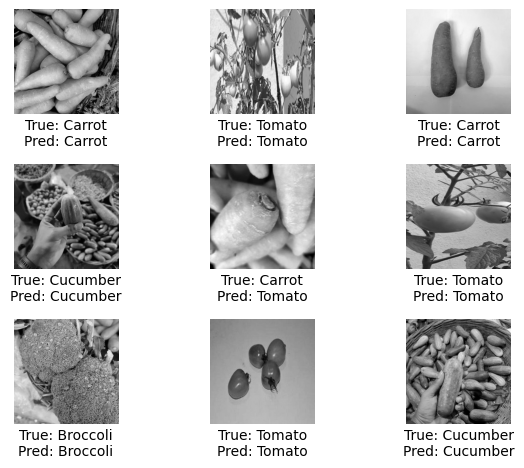

In [16]:
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i], cmap="gray")
    plt.axis("off")
    plt.text(0.5, -0.15, f"True: {classes[true_labels[i]]}", ha="center", transform=plt.gca().transAxes)
    plt.text(0.5, -0.3, f"Pred: {classes[pred_labels[i]]}", ha="center", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

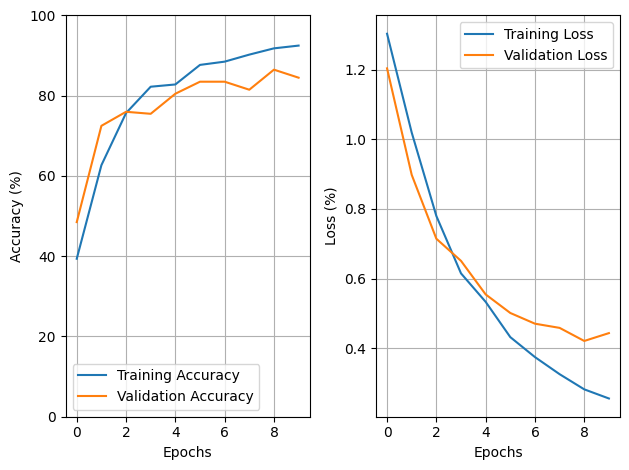

In [28]:
plt.subplot(1, 2, 1)
plt.plot([x * 100 for x in history.history["accuracy"]], label="Training Accuracy")
plt.plot([x * 100 for x in history.history["val_accuracy"]], label="Validation Accuracy")
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.ylim(bottom=0, top=100)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss (%)")
plt.legend()

plt.tight_layout()
plt.show()